In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/iris_dataset.csv')

In [ ]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,14.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,15.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,16.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,16.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,16.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#dropping the unnecessary columns
data.drop(['CALC'], axis=1, inplace=True)

In [ ]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,MTRANS,NObeyesdad
0,Female,14.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,Public_Transportation,Normal_Weight
1,Female,15.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Public_Transportation,Normal_Weight
2,Male,16.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Public_Transportation,Normal_Weight
3,Male,16.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Walking,Overweight_Level_I
4,Male,16.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Female,18.0,1.66,59.0,no,yes,1,3,Always,no,2,yes,3,0,Automobile,Normal_Weight
237,Female,18.0,1.64,53.0,yes,yes,3,3,Sometimes,no,1,no,1,1,Public_Transportation,Normal_Weight
238,Female,18.0,1.62,53.0,no,yes,3,1,Sometimes,no,3,no,1,1,Public_Transportation,Normal_Weight
239,Female,18.0,1.70,64.0,yes,yes,3,3,no,no,3,yes,3,1,Public_Transportation,Normal_Weight


In [ ]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
#from the above we came to know that no data is missing

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_encoded = data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoded['Gender'] = le.fit_transform(data_encoded['Gender'])
data_encoded['family_history_with_overweight'] = le.fit_transform(data_encoded['family_history_with_overweight'])
data_encoded['FAVC'] = le.fit_transform(data_encoded['FAVC'])
data_encoded['CAEC'] = le.fit_transform(data_encoded['CAEC'])
data_encoded['SMOKE'] = le.fit_transform(data_encoded['SMOKE'])
data_encoded['MTRANS'] = le.fit_transform(data_encoded['MTRANS'])


In [ ]:
data_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,MTRANS,NObeyesdad
0,0,14.0,1.62,64.0,1,0,2,3,2,0,2,no,0,1,3,Normal_Weight
1,0,15.0,1.52,56.0,1,0,3,3,2,1,3,yes,3,0,3,Normal_Weight
2,1,16.0,1.80,77.0,1,0,2,3,2,0,2,no,2,1,3,Normal_Weight
3,1,16.0,1.80,87.0,0,0,3,3,2,0,2,no,2,0,4,Overweight_Level_I
4,1,16.0,1.78,89.8,0,0,2,1,2,0,2,no,0,0,3,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,18.0,1.66,59.0,0,1,1,3,0,0,2,yes,3,0,0,Normal_Weight
237,0,18.0,1.64,53.0,1,1,3,3,2,0,1,no,1,1,3,Normal_Weight
238,0,18.0,1.62,53.0,0,1,3,1,2,0,3,no,1,1,3,Normal_Weight
239,0,18.0,1.70,64.0,1,1,3,3,3,0,3,yes,3,1,3,Normal_Weight


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoded['NObeyesdad'] = le.fit_transform(data_encoded['NObeyesdad'])


In [ ]:
data2 = data.copy()

In [ ]:


# Define the intervals and corresponding labels for the age categories
intervals = [0, 2, 5, 12, 18]  # Define the age intervals
labels = ['toddler', 'preschooler', 'school-age', 'adolescent']  # Define the labels for each category

# Convert 'age' into categorical variables using pd.cut()
data2['age_category'] = pd.cut(data2['Age'], bins=intervals, labels=labels, right=False)

# View the updated DataFrame with the new 'age_category' column
data2


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,MTRANS,NObeyesdad,age_category
0,Female,14.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,Public_Transportation,Normal_Weight,adolescent
1,Female,15.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Public_Transportation,Normal_Weight,adolescent
2,Male,16.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Public_Transportation,Normal_Weight,adolescent
3,Male,16.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Walking,Overweight_Level_I,adolescent
4,Male,16.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Public_Transportation,Overweight_Level_II,adolescent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Female,18.0,1.66,59.0,no,yes,1,3,Always,no,2,yes,3,0,Automobile,Normal_Weight,NaN
237,Female,18.0,1.64,53.0,yes,yes,3,3,Sometimes,no,1,no,1,1,Public_Transportation,Normal_Weight,NaN
238,Female,18.0,1.62,53.0,no,yes,3,1,Sometimes,no,3,no,1,1,Public_Transportation,Normal_Weight,NaN
239,Female,18.0,1.70,64.0,yes,yes,3,3,no,no,3,yes,3,1,Public_Transportation,Normal_Weight,NaN


In [ ]:
data_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,MTRANS,NObeyesdad
0,0,14.0,1.62,64.0,1,0,2,3,2,0,2,no,0,1,3,1
1,0,15.0,1.52,56.0,1,0,3,3,2,1,3,yes,3,0,3,1
2,1,16.0,1.80,77.0,1,0,2,3,2,0,2,no,2,1,3,1
3,1,16.0,1.80,87.0,0,0,3,3,2,0,2,no,2,0,4,5
4,1,16.0,1.78,89.8,0,0,2,1,2,0,2,no,0,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,18.0,1.66,59.0,0,1,1,3,0,0,2,yes,3,0,0,1
237,0,18.0,1.64,53.0,1,1,3,3,2,0,1,no,1,1,3,1
238,0,18.0,1.62,53.0,0,1,3,1,2,0,3,no,1,1,3,1
239,0,18.0,1.70,64.0,1,1,3,3,3,0,3,yes,3,1,3,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_encoded[['Age', 'Height', 'Weight']] = scaler.fit_transform(data_encoded[['Age', 'Height', 'Weight']])


In [ ]:
data_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,MTRANS,NObeyesdad
0,0,0.00,0.311111,0.266667,1,0,2,3,2,0,2,no,0,1,3,1
1,0,0.25,0.088889,0.177778,1,0,3,3,2,1,3,yes,3,0,3,1
2,1,0.50,0.711111,0.411111,1,0,2,3,2,0,2,no,2,1,3,1
3,1,0.50,0.711111,0.522222,0,0,3,3,2,0,2,no,2,0,4,5
4,1,0.50,0.666667,0.553333,0,0,2,1,2,0,2,no,0,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,1.00,0.400000,0.211111,0,1,1,3,0,0,2,yes,3,0,0,1
237,0,1.00,0.355556,0.144444,1,1,3,3,2,0,1,no,1,1,3,1
238,0,1.00,0.311111,0.144444,0,1,3,1,2,0,3,no,1,1,3,1
239,0,1.00,0.488889,0.266667,1,1,3,3,3,0,3,yes,3,1,3,1


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data_encoded[['Age', 'Height', 'Weight']] = scaler.fit_transform(data_encoded[['Age', 'Height', 'Weight']])


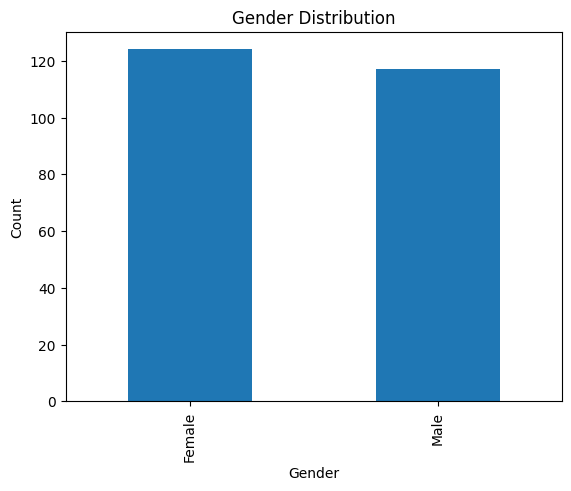

In [ ]:
# Explore Gender distribution
gender_counts = data['Gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

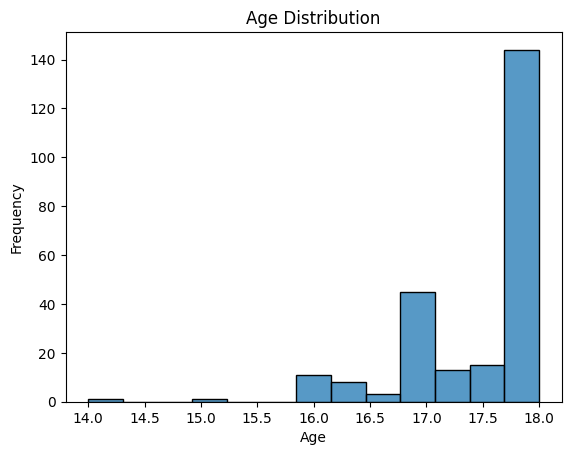

In [ ]:
# Explore Age distribution
data['Age'].describe()
sns.histplot(data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

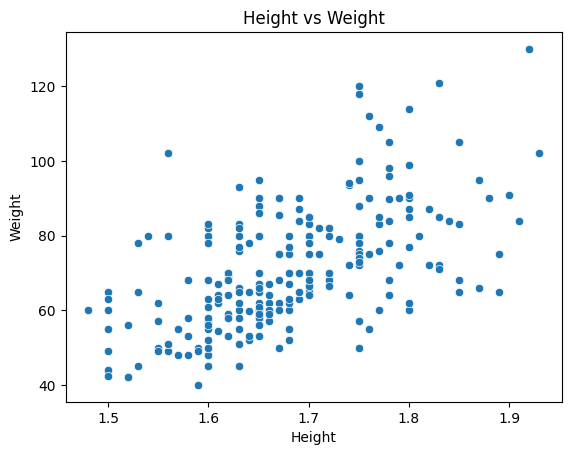

In [ ]:
# Explore Height and Weight relationship
sns.scatterplot(data=data, x='Height', y='Weight')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

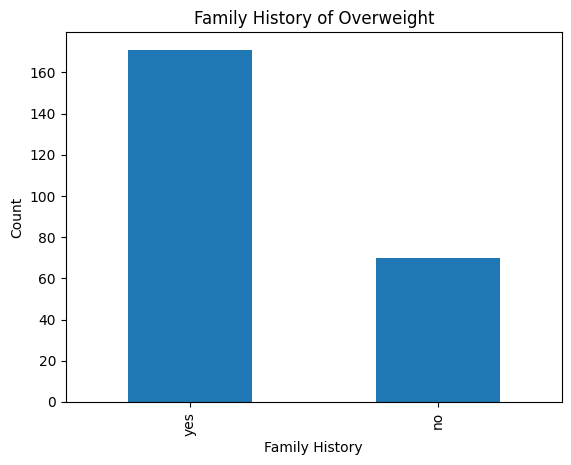

In [ ]:
# Explore family_history_with_overweight
family_history_counts = data['family_history_with_overweight'].value_counts()
family_history_counts.plot(kind='bar')
plt.title('Family History of Overweight')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

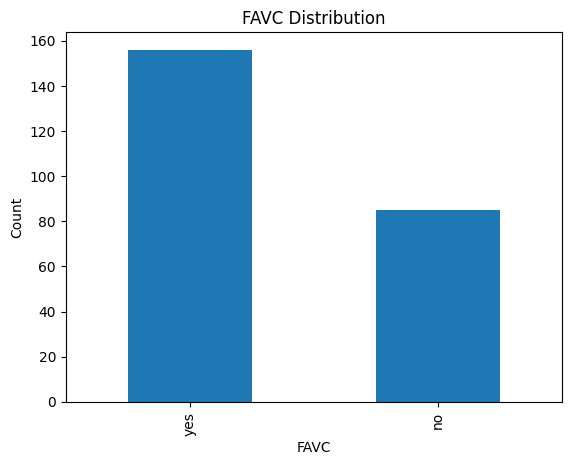

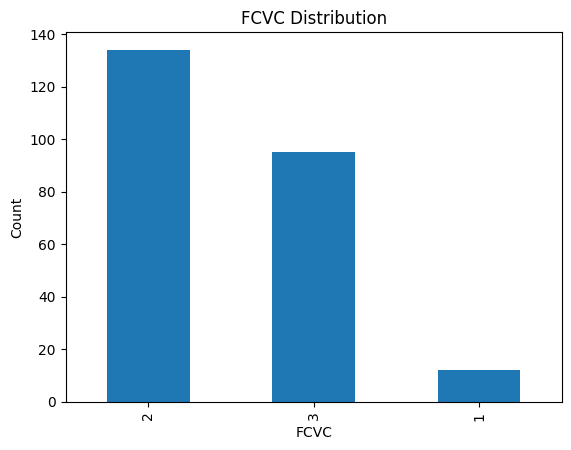

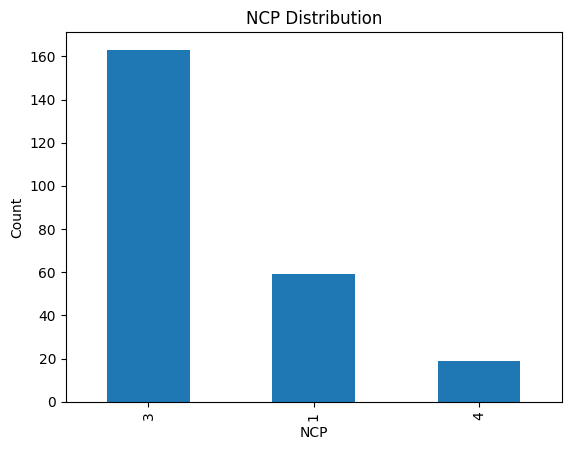

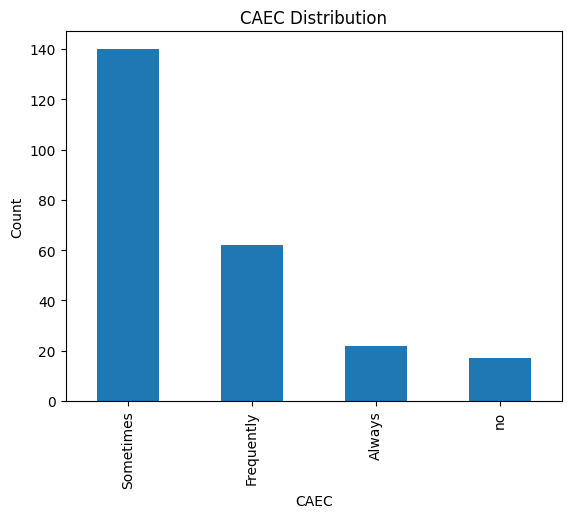

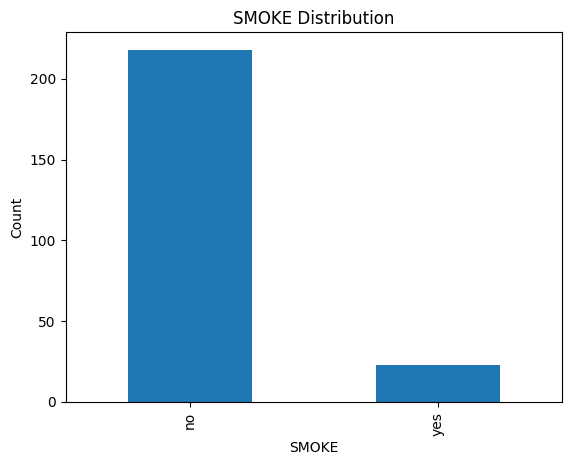

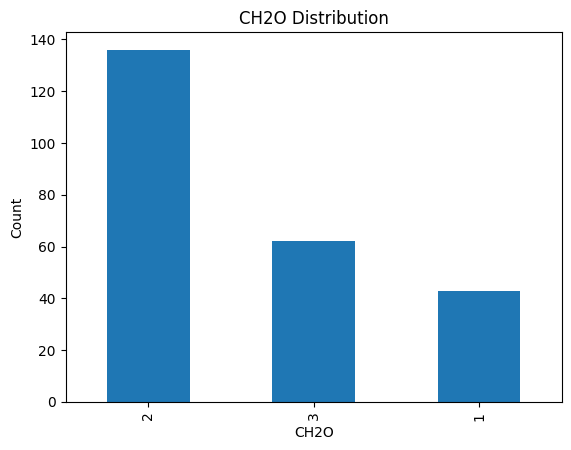

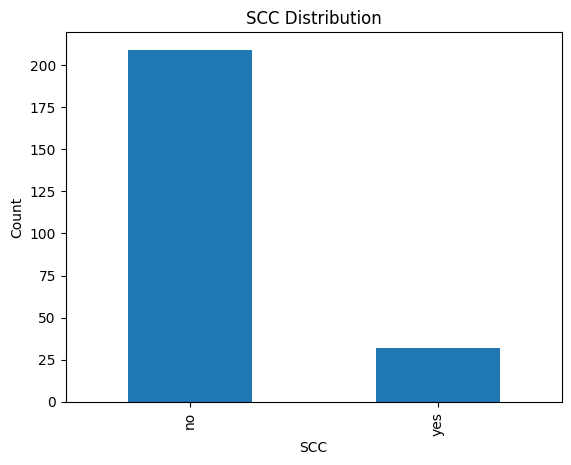

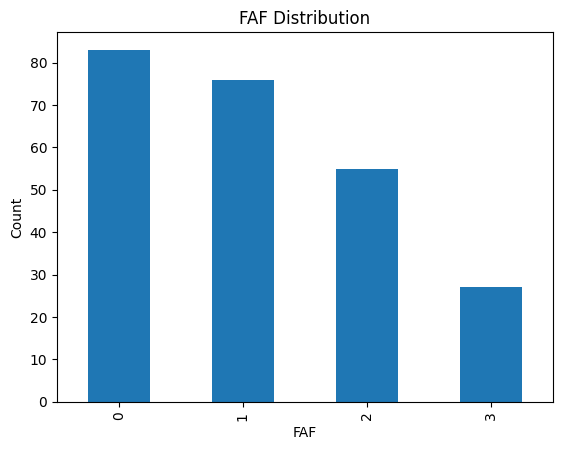

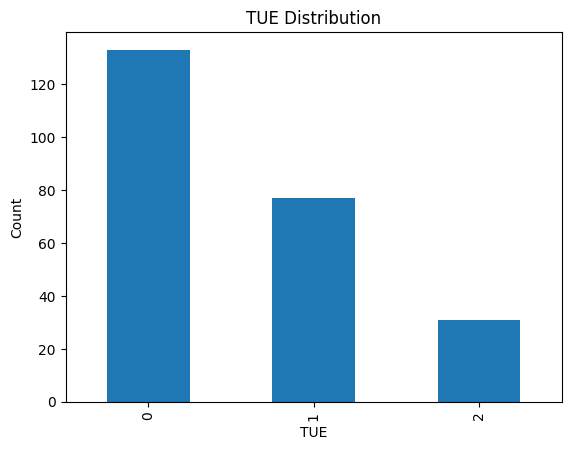

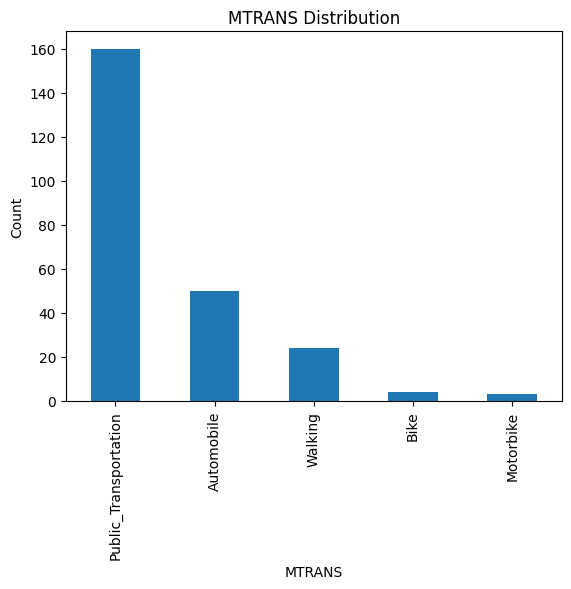

In [ ]:
# Explore other categorical attributes
categorical_attributes = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'MTRANS']
for attribute in categorical_attributes:
    attribute_counts = data[attribute].value_counts()
    attribute_counts.plot(kind='bar')
    plt.title(f'{attribute} Distribution')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.show()


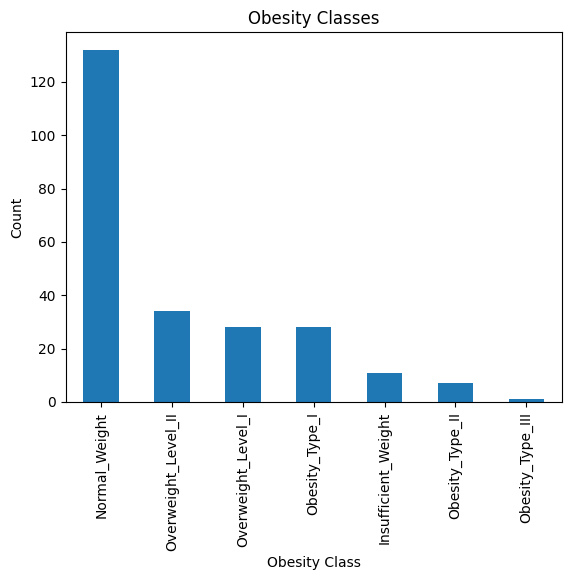

In [ ]:
# Explore NObeyesdad distribution
obesity_counts = data['NObeyesdad'].value_counts()
obesity_counts.plot(kind='bar')
plt.title('Obesity Classes')
plt.xlabel('Obesity Class')
plt.ylabel('Count')
plt.show()


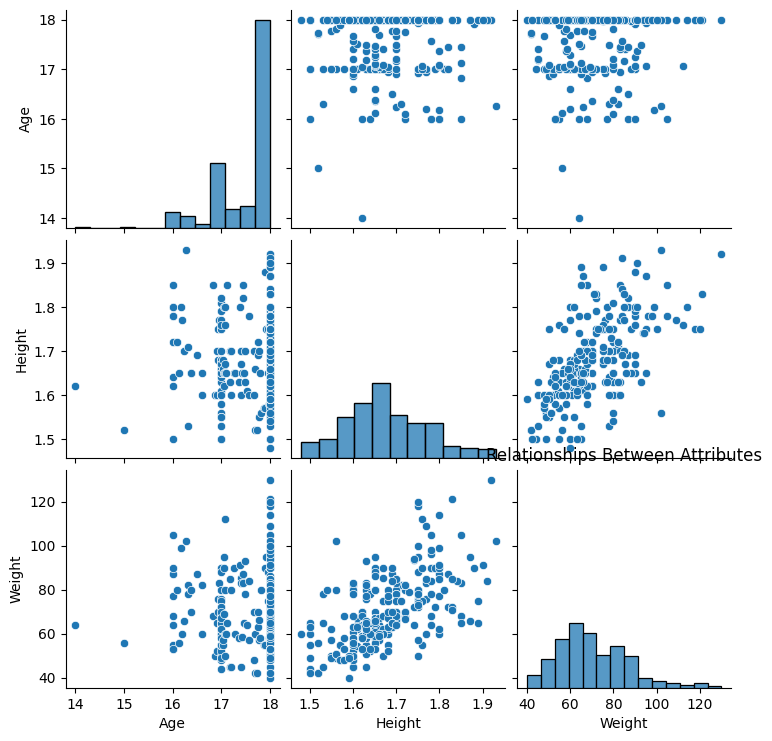

In [ ]:
# Explore relationships between attributes using scatter plots or correlation matrices
sns.pairplot(data[['Age', 'Height', 'Weight']])
plt.title('Relationships Between Attributes')
plt.show()

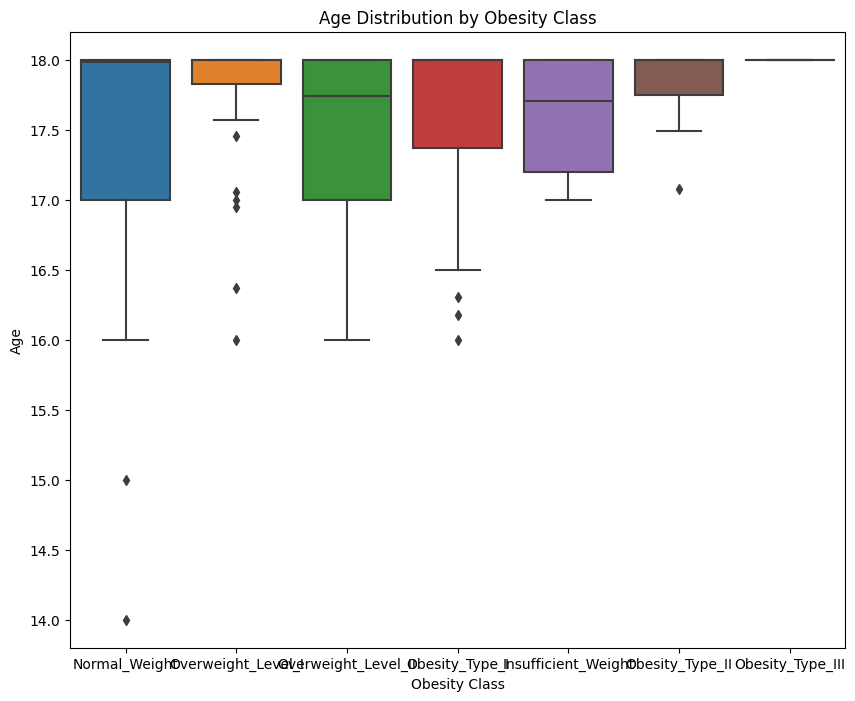

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the width and height as desired
sns.boxplot(data=data, x='NObeyesdad', y='Age')
plt.title('Age Distribution by Obesity Class')
plt.xlabel('Obesity Class')
plt.ylabel('Age')
plt.show()


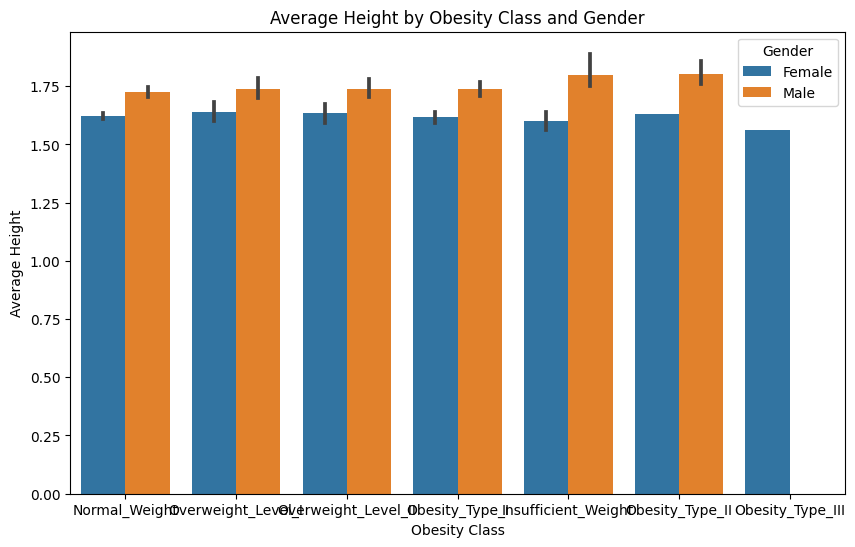

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired
sns.barplot(data=data, x='NObeyesdad', y='Height', hue='Gender')
plt.title('Average Height by Obesity Class and Gender')
plt.xlabel('Obesity Class')
plt.ylabel('Average Height')
plt.show()


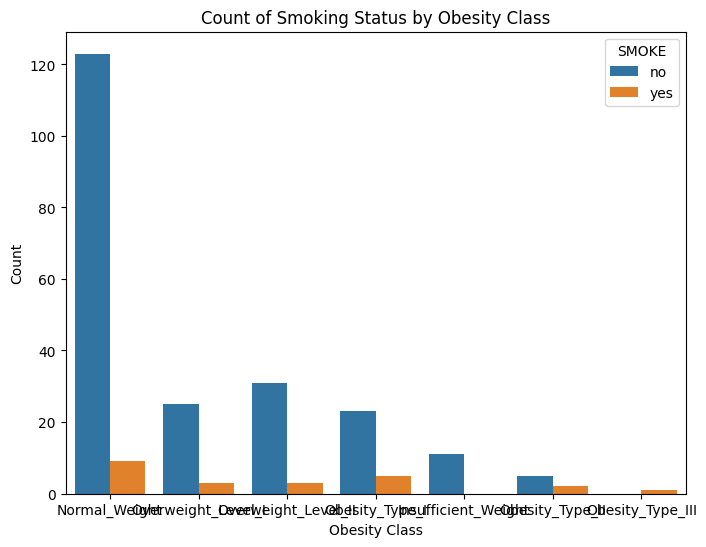

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the width and height as desired
sns.countplot(data=data, x='NObeyesdad', hue='SMOKE')
plt.title('Count of Smoking Status by Obesity Class')
plt.xlabel('Obesity Class')
plt.ylabel('Count')
plt.show()


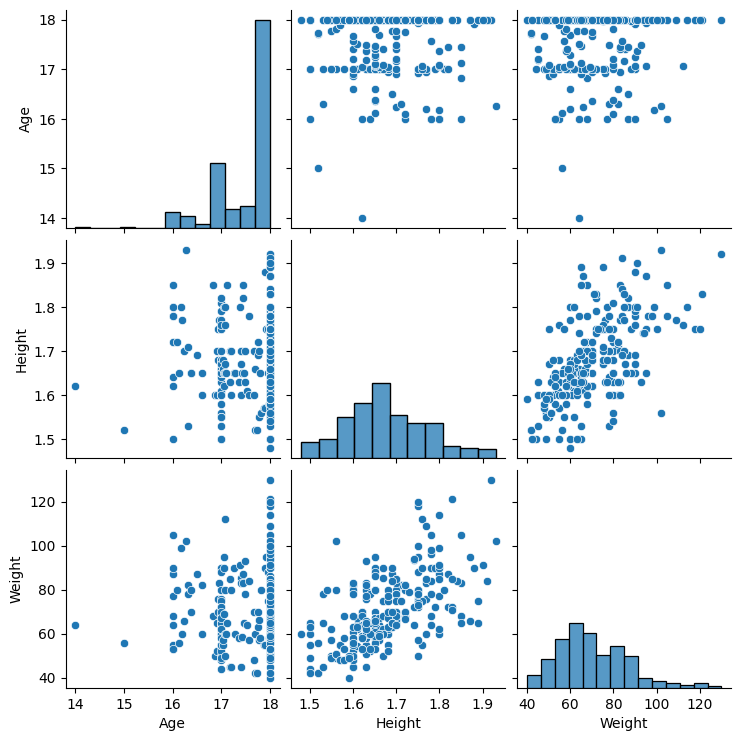

In [ ]:
import seaborn as sns

# Select the numeric attributes for correlation analysis
numeric_attributes = ['Age', 'Height', 'Weight']

# Create a scatterplot matrix with correlation values
sns.pairplot(data[numeric_attributes])
plt.show()


<ipython-input-30-e3d9e4fd553f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


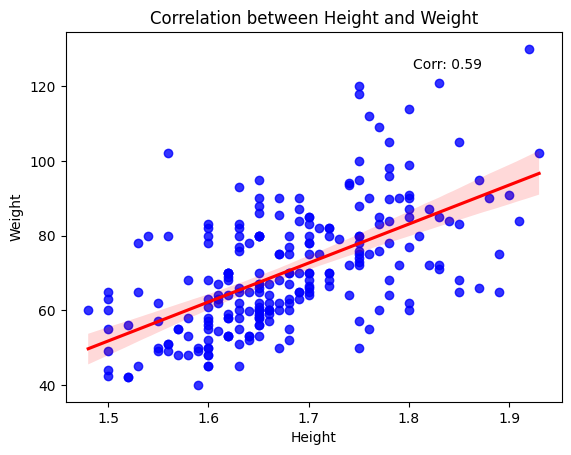

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
# Plot correlation line between Height and Weight with different colors
sns.regplot(x='Height', y='Weight', data=data, line_kws={'color':'red'}, scatter_kws={'color':'blue'})

# Set plot title and labels
plt.title('Correlation between Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.annotate(f"Corr: {corr_matrix.loc['Height', 'Weight']:.2f}", xy=(0.7, 0.9), xycoords='axes fraction')

# Show the plot
plt.show()


<ipython-input-31-cda512517983>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


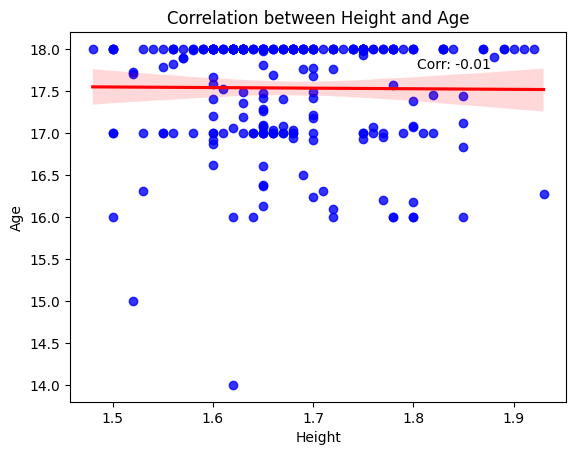

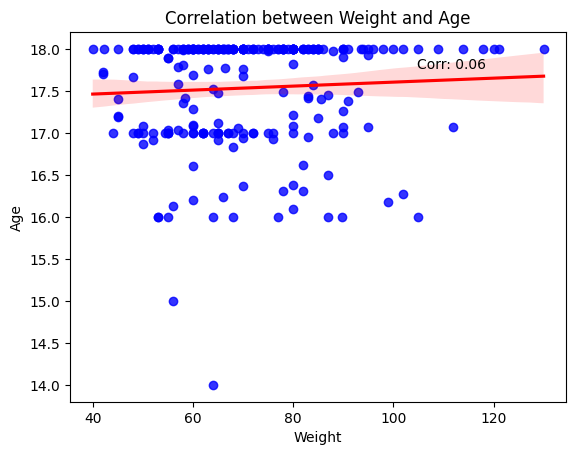

In [ ]:
corr_matrix = data.corr()
# Correlation plot between Height and Age
sns.regplot(x='Height', y='Age', data=data, line_kws={'color':'red'}, scatter_kws={'color':'blue'})
plt.title('Correlation between Height and Age')
plt.xlabel('Height')
plt.ylabel('Age')
plt.annotate(f"Corr: {corr_matrix.loc['Height', 'Age']:.2f}", xy=(0.7, 0.9), xycoords='axes fraction')
plt.show()

# Correlation plot between Weight and Age
sns.regplot(x='Weight', y='Age', data=data, line_kws={'color':'red'}, scatter_kws={'color':'blue'})
plt.title('Correlation between Weight and Age')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.annotate(f"Corr: {corr_matrix.loc['Weight', 'Age']:.2f}", xy=(0.7, 0.9), xycoords='axes fraction')
plt.show()


<ipython-input-32-0052ead54c12>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


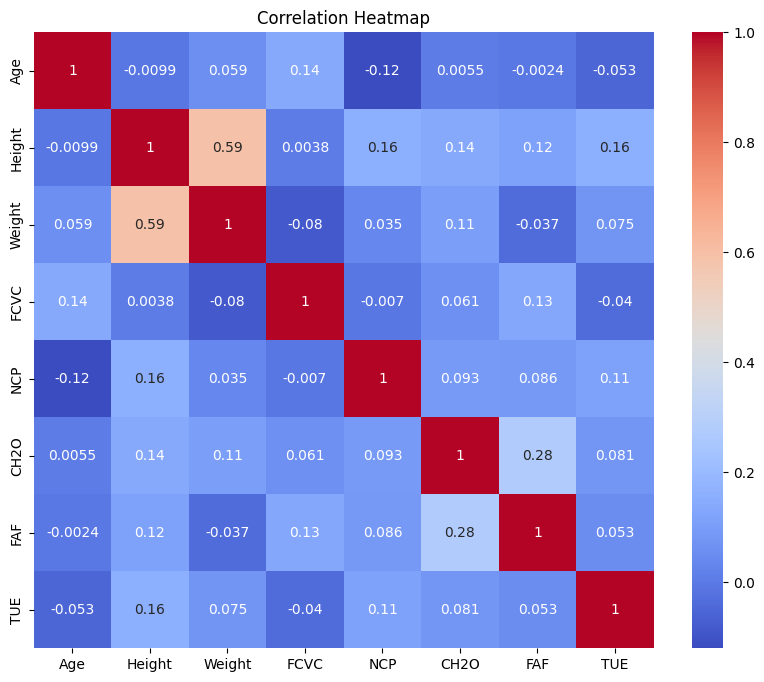

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = data.corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#covariance

In [ ]:
data_encoded.drop(['SCC'], axis=1, inplace=True)
data_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,0,0.00,0.311111,0.266667,1,0,2,3,2,0,2,0,1,3,1
1,0,0.25,0.088889,0.177778,1,0,3,3,2,1,3,3,0,3,1
2,1,0.50,0.711111,0.411111,1,0,2,3,2,0,2,2,1,3,1
3,1,0.50,0.711111,0.522222,0,0,3,3,2,0,2,2,0,4,5
4,1,0.50,0.666667,0.553333,0,0,2,1,2,0,2,0,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,1.00,0.400000,0.211111,0,1,1,3,0,0,2,3,0,0,1
237,0,1.00,0.355556,0.144444,1,1,3,3,2,0,1,1,1,3,1
238,0,1.00,0.311111,0.144444,0,1,3,1,2,0,3,1,1,3,1
239,0,1.00,0.488889,0.266667,1,1,3,3,3,0,3,3,1,3,1


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data_encoded.drop('NObeyesdad', axis=1)
y = data_encoded['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier()


In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.81      1.00      0.90        26
           2       0.80      0.50      0.62         8
           3       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         4
           6       0.50      0.50      0.50         8

    accuracy                           0.71        49
   macro avg       0.52      0.42      0.45        49
weighted avg       0.68      0.71      0.69        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your feature matrix 'X' and target variable 'y'

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid for the model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the model
model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.698110661268556
Test Accuracy: 0.7142857142857143


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your feature matrix 'X' and target variable 'y'

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
support_vector_machine = SVC()

# Train and evaluate Logistic Regression
logistic_regression.fit(X_train, y_train)
lr_predictions = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# Train and evaluate Decision Tree
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Train and evaluate Support Vector Machine
support_vector_machine.fit(X_train, y_train)
svm_predictions = support_vector_machine.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy)


Logistic Regression Accuracy: 0.5918367346938775
Decision Tree Accuracy: 0.7755102040816326


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.673469387755102
Support Vector Machine Accuracy: 0.5306122448979592


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your feature matrix 'X' and target variable 'y'

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
adaboost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()
sgd_classifier = SGDClassifier()

# Train and evaluate AdaBoostClassifier
adaboost.fit(X_train, y_train)
adaboost_predictions = adaboost.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoostClassifier Accuracy:", adaboost_accuracy)

# Train and evaluate GradientBoostingClassifier
gradient_boosting.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
print("GradientBoostingClassifier Accuracy:", gradient_boosting_accuracy)

# Train and evaluate SGDClassifier
sgd_classifier.fit(X_train, y_train)
sgd_classifier_predictions = sgd_classifier.predict(X_test)
sgd_classifier_accuracy = accuracy_score(y_test, sgd_classifier_predictions)
print("SGDClassifier Accuracy:", sgd_classifier_accuracy)


AdaBoostClassifier Accuracy: 0.6326530612244898
GradientBoostingClassifier Accuracy: 0.7959183673469388
SGDClassifier Accuracy: 0.5510204081632653


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Assuming you have your feature matrix 'X' and target variable 'y'

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    MLPClassifier(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(model.__class__.__name__, "Accuracy:", accuracy)


KNeighborsClassifier Accuracy: 0.5306122448979592
SVC Accuracy: 0.5306122448979592
DecisionTreeClassifier Accuracy: 0.7959183673469388
RandomForestClassifier Accuracy: 0.6938775510204082
AdaBoostClassifier Accuracy: 0.6326530612244898
GradientBoostingClassifier Accuracy: 0.7755102040816326
SGDClassifier Accuracy: 0.2653061224489796
GaussianNB Accuracy: 0.22448979591836735
LinearDiscriminantAnalysis Accuracy: 0.7755102040816326


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Accuracy: 0.5306122448979592


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessClassifier Accuracy: 0.5714285714285714
XGBClassifier Accuracy: 0.8163265306122449
LGBMClassifier Accuracy: 0.8367346938775511
Learning rate set to 0.07274
0:	learn: 1.8736042	total: 49.3ms	remaining: 49.2s
1:	learn: 1.8190875	total: 50.9ms	remaining: 25.4s
2:	learn: 1.7455198	total: 52.4ms	remaining: 17.4s
3:	learn: 1.6691985	total: 53.8ms	remaining: 13.4s
4:	learn: 1.6229294	total: 55.3ms	remaining: 11s
5:	learn: 1.5600339	total: 57.1ms	remaining: 9.46s
6:	learn: 1.5232638	total: 59ms	remaining: 8.36s
7:	learn: 1.4723116	total: 61.1ms	remaining: 7.58s
8:	learn: 1.4291962	total: 63.1ms	remaining: 6.95s
9:	learn: 1.3898965	total: 65ms	remaining: 6.44s
10:	learn: 1.3442603	total: 67ms	remaining: 6.02s
11:	learn: 1.3111930	total: 68.9ms	remaining: 5.67s
12:	learn: 1.2708260	total: 70.6ms	remaining: 5.36s
13:	learn: 1.2386601	total: 72.5ms	remaining: 5.1s
14:	learn: 1.2112777	total: 74.3ms	remaining: 4.88s
15:	learn: 1.1847015	total: 76.2ms	remaining: 4.69s
16:	learn: 1.160

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Assuming you have your feature matrix 'X' and target variable 'y'

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    MLPClassifier(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(model.__class__.__name__, "Accuracy:", accuracy)
    report = classification_report(y_test, predictions)
    print(model.__class__.__name__)
    print(report)
    print('-' * 40)


KNeighborsClassifier Accuracy: 0.5306122448979592
KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.92      0.77        26
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.22      0.25      0.24         8

    accuracy                           0.53        49
   macro avg       0.15      0.20      0.17        49
weighted avg       0.39      0.53      0.45        49

----------------------------------------
SVC Accuracy: 0.5306122448979592
SVC
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.53      1.00      0.69        26
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         2
           5       0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

RandomForestClassifier Accuracy: 0.7142857142857143
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.84      1.00      0.91        26
           2       0.80      0.50      0.62         8
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.45      0.62      0.53         8

    accuracy                           0.71        49
   macro avg       0.35      0.35      0.34        49
weighted avg       0.65      0.71      0.67        49

----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoostClassifier Accuracy: 0.6326530612244898
AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      0.96      0.89        26
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.32      0.75      0.44         8

    accuracy                           0.63        49
   macro avg       0.19      0.29      0.22        49
weighted avg       0.49      0.63      0.55        49

----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier Accuracy: 0.7755102040816326
GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.86      0.92      0.89        26
           2       0.86      0.75      0.80         8
           3       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         4
           6       0.62      0.62      0.62         8

    accuracy                           0.78        49
   macro avg       0.64      0.72      0.66        49
weighted avg       0.75      0.78      0.76        49

----------------------------------------
SGDClassifier Accuracy: 0.5102040816326531
SGDClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.66      0.88      0.75        26
           2       0.00      0.00      0.00         8
           3       0.25      0.50      0.33         2
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_

MLPClassifier Accuracy: 0.5306122448979592
MLPClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.96      0.72        26
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.25      0.12      0.17         8

    accuracy                           0.53        49
   macro avg       0.14      0.18      0.15        49
weighted avg       0.35      0.53      0.41        49

----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessClassifier Accuracy: 0.5714285714285714
GaussianProcessClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.65      1.00      0.79        26
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.22      0.25      0.24         8

    accuracy                           0.57        49
   macro avg       0.15      0.21      0.17        49
weighted avg       0.38      0.57      0.46        49

----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier Accuracy: 0.8163265306122449
XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.93      0.96      0.94        26
           2       1.00      0.75      0.86         8
           3       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         4
           6       0.55      0.75      0.63         8

    accuracy                           0.82        49
   macro avg       0.69      0.74      0.71        49
weighted avg       0.79      0.82      0.80        49

----------------------------------------
LGBMClassifier Accuracy: 0.8367346938775511
LGBMClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.90      1.00      0.95        26
           2       0.86      0.75      0.80         8
           3       1.00      1.00      1.00         2
           5       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15:	learn: 1.1847015	total: 58.3ms	remaining: 3.59s
16:	learn: 1.1605437	total: 63.3ms	remaining: 3.66s
17:	learn: 1.1357831	total: 69.9ms	remaining: 3.81s
18:	learn: 1.1180372	total: 74.6ms	remaining: 3.85s
19:	learn: 1.1000895	total: 76.6ms	remaining: 3.75s
20:	learn: 1.0712304	total: 77.6ms	remaining: 3.62s
21:	learn: 1.0524607	total: 79.5ms	remaining: 3.53s
22:	learn: 1.0328318	total: 81.2ms	remaining: 3.45s
23:	learn: 1.0133128	total: 83ms	remaining: 3.37s
24:	learn: 0.9973744	total: 84.8ms	remaining: 3.31s
25:	learn: 0.9819289	total: 86.7ms	remaining: 3.25s
26:	learn: 0.9677489	total: 88.5ms	remaining: 3.19s
27:	learn: 0.9529002	total: 90.3ms	remaining: 3.13s
28:	learn: 0.9362398	total: 92.2ms	remaining: 3.09s
29:	learn: 0.9259349	total: 94ms	remaining: 3.04s
30:	learn: 0.9106084	total: 95.8ms	remaining: 3s
31:	learn: 0.8941228	total: 98.4ms	remaining: 2.98s
32:	learn: 0.8842539	total: 100ms	remaining: 2.93s
33:	learn: 0.8701132	total: 102ms	remaining: 2.9s
34:	learn: 0.8590035	t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.07274
0:	learn: 1.8736042	total: 1.79ms	remaining: 1.79s
1:	learn: 1.8190875	total: 3.5ms	remaining: 1.75s
2:	learn: 1.7455198	total: 6.24ms	remaining: 2.07s
3:	learn: 1.6691985	total: 7.73ms	remaining: 1.93s
4:	learn: 1.6229294	total: 9.28ms	remaining: 1.85s
5:	learn: 1.5600339	total: 11.2ms	remaining: 1.86s
6:	learn: 1.5232638	total: 12.9ms	remaining: 1.82s
7:	learn: 1.4723116	total: 15.1ms	remaining: 1.88s
8:	learn: 1.4291962	total: 17.7ms	remaining: 1.94s
9:	learn: 1.3898965	total: 19.3ms	remaining: 1.91s
10:	learn: 1.3442603	total: 20.7ms	remaining: 1.86s
11:	learn: 1.3111930	total: 22.3ms	remaining: 1.83s
12:	learn: 1.2708260	total: 23.7ms	remaining: 1.8s
13:	learn: 1.2386601	total: 25.2ms	remaining: 1.77s
14:	learn: 1.2112777	total: 28ms	remaining: 1.84s
15:	learn: 1.1847015	total: 30.6ms	remaining: 1.88s
16:	learn: 1.1605437	total: 32.4ms	remaining: 1.88s
17:	learn: 1.1357831	total: 34.1ms	remaining: 1.86s
18:	learn: 1.1180372	total: 36ms	remaining: 1.86s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


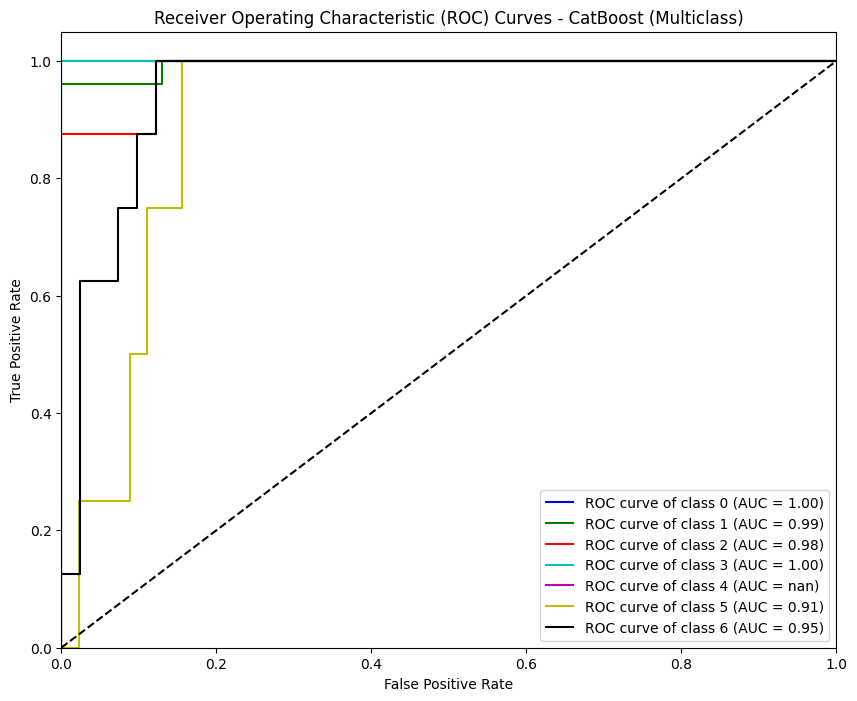

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

# Assuming you have your feature matrix 'X' and target variable 'y' (multiclass)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoostClassifier model
model = CatBoostClassifier()
model.fit(X_train, y_train)

# Convert the target variable into one-hot encoded format
y_test_encoded = label_binarize(y_test, classes=np.unique(y))

# Compute the predicted probabilities for each class
y_pred_prob = model.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label='ROC curve of class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves - CatBoost (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grids for each model
param_grid = [
    {'n_neighbors': [3, 5, 7]},  # KNeighborsClassifier
    {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},  # SVC
    {'max_depth': [None, 5, 10]},  # DecisionTreeClassifier
    {'n_estimators': [100, 200, 300]},  # RandomForestClassifier
    {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1.0]},  # AdaBoostClassifier
    {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.5, 1.0]},  # GradientBoostingClassifier
    {'alpha': [0.0001, 0.001, 0.01], 'penalty': ['l1', 'l2']},  # SGDClassifier
    {},  # GaussianNB (no hyperparameters to tune)
    {},  # LinearDiscriminantAnalysis (no hyperparameters to tune)
    {'hidden_layer_sizes': [(50,), (100,), (200,)], 'alpha': [0.0001, 0.001, 0.01]},  # MLPClassifier
    {},  # GaussianProcessClassifier (no hyperparameters to tune)
    {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.5, 1.0]},  # XGBClassifier
    {'max_depth': [None, 5, 10], 'learning_rate': [0.1, 0.5, 1.0]},  # LGBMClassifier
    {'depth': [3, 5, 7], 'learning_rate': [0.1, 0.5, 1.0]},  # CatBoostClassifier
]

# Perform Grid Search CV for each model
for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(model.__class__.__name__)
    print("Best Parameters:", best_params)
    print("Best Score:", best_score)
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNeighborsClassifier
Best Parameters: {'n_neighbors': 5}
Best Score: 0.5311740890688259



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVC
Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Score: 0.5732793522267207

DecisionTreeClassifier
Best Parameters: {'max_depth': None}
Best Score: 0.7029689608636979



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomForestClassifier
Best Parameters: {'n_estimators': 300}
Best Score: 0.6775978407557355



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


AdaBoostClassifier
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Best Score: 0.6354925775978407



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GradientBoostingClassifier
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best Score: 0.7966261808367072



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SGDClassifier
Best Parameters: {'alpha': 0.001, 'penalty': 'l1'}
Best Score: 0.620242914979757

GaussianNB
Best Parameters: {}
Best Score: 0.2658569500674764

LinearDiscriminantAnalysis
Best Parameters: {}
Best Score: 0.8388663967611336



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't c

MLPClassifier
Best Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (100,)}
Best Score: 0.5785425101214574



/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: Converg

GaussianProcessClassifier
Best Parameters: {}
Best Score: 0.5468286099865047



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/l

XGBClassifier
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3}
Best Score: nan

LGBMClassifier
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best Score: 0.7291497975708502

0:	learn: 1.7865539	total: 609us	remaining: 608ms
1:	learn: 1.6928311	total: 1.13ms	remaining: 563ms
2:	learn: 1.5860476	total: 1.58ms	remaining: 526ms
3:	learn: 1.5276090	total: 1.98ms	remaining: 494ms
4:	learn: 1.4427207	total: 3.05ms	remaining: 607ms
5:	learn: 1.3817132	total: 3.73ms	remaining: 617ms
6:	learn: 1.3474675	total: 4.36ms	remaining: 619ms
7:	learn: 1.2946315	total: 5.01ms	remaining: 621ms
8:	learn: 1.2567792	total: 5.63ms	remaining: 620ms
9:	learn: 1.2131651	total: 6.27ms	remaining: 620ms
10:	learn: 1.1734346	total: 6.88ms	remaining: 619ms
11:	learn: 1.1411624	total: 7.54ms	remaining: 621ms
12:	learn: 1.1165649	total: 8.2ms	remaining: 623ms
13:	learn: 1.0916941	total: 8.83ms	remaining: 622ms
14:	learn: 1.0775445	total: 9.45ms	remaining: 620ms
15:	learn: 1.0533562	total: 10.1ms	remaini

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
4:	learn: 0.5112268	total: 13.1ms	remaining: 2.6s
5:	learn: 0.4353923	total: 15.8ms	remaining: 2.62s
6:	learn: 0.3791401	total: 18.7ms	remaining: 2.65s
7:	learn: 0.3276888	total: 21.5ms	remaining: 2.66s
8:	learn: 0.2589567	total: 24.3ms	remaining: 2.67s
9:	learn: 0.2311785	total: 27.3ms	remaining: 2.7s
10:	learn: 0.1884545	total: 30ms	remaining: 2.7s
11:	learn: 0.1662177	total: 32.8ms	remaining: 2.7s
12:	learn: 0.1534958	total: 35.6ms	remaining: 2.71s
13:	learn: 0.1323960	total: 38.3ms	remaining: 2.7s
14:	learn: 0.1224242	total: 40.9ms	remaining: 2.69s
15:	learn: 0.1174428	total: 43.8ms	remaining: 2.69s
16:	learn: 0.1107810	total: 46.3ms	remaining: 2.68s
17:	learn: 0.1056969	total: 48.7ms	remaining: 2.66s
18:	learn: 0.0982948	total: 51.4ms	remaining: 2.65s
19:	learn: 0.0911248	total: 53.9ms	remaining: 2.64s
20:	learn: 0.0857330	total: 56.4ms	remaining: 2.63s
21:	learn: 0.0826983	total: 58.9ms	remaining: 2.62s
22:	learn: 0.0790476	total

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


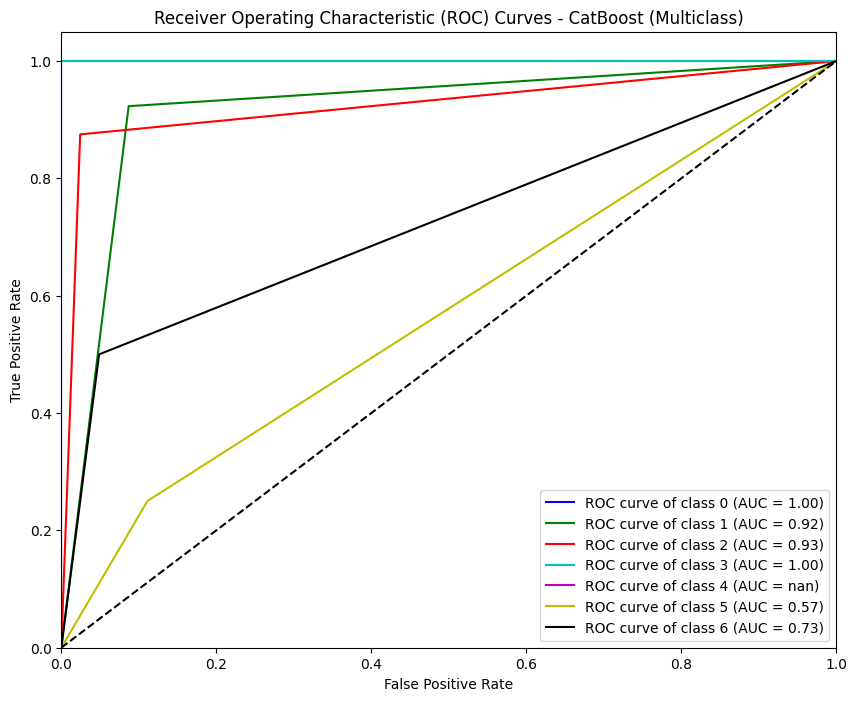

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

# Assuming you have your feature matrix 'X' and target variable 'y' (multiclass)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoostClassifier model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Convert the target variable into one-hot encoded format
y_test_encoded = label_binarize(y_test, classes=np.unique(y))

# Compute the predicted probabilities for each class
y_pred_prob = model.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label='ROC curve of class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves - CatBoost (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
!pip install catboost

from catboost import CatBoostClassifier

# Create and train the CatBoostClassifier model
model = CatBoostClassifier()
model.fit(X_train, y_train)

# Specify the file path to save the model
model_path = '/content/model.cbm'

# Save the model
model.save_model(model_path)

# Load the model
loaded_model = CatBoostClassifier()
loaded_model.load_model(model_path)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Learning rate set to 0.07274
0:	learn: 1.8736042	total: 2.33ms	remaining: 2.33s
1:	learn: 1.8190875	total: 3.91ms	remaining: 1.95s
2:	learn: 1.7455198	total: 5.41ms	remaining: 1.8s
3:	learn: 1.6691985	total: 7.03ms	remaining: 1.75s
4:	learn: 1.6229294	total: 8.81ms	remaining: 1.75s
5:	learn: 1.5600339	total: 10.8ms	remaining: 1.79s
6:	learn: 1.5232638	total: 15.1ms	remaining: 2.14s
7:	learn: 1.4723116	total: 18.3ms	remaining: 2.27s
8:	learn: 1.4291962	total: 21.8ms	remaining: 2.4s
9:	learn: 1.3898965	total: 24.2ms	remaining: 2.4s
10:	learn: 1.3442603	total: 26.5ms	remaining: 2.38s
11:	learn: 1.3111930	total: 28.4ms	remaining: 2.34s
12:	learn: 1.2708260	total: 30.2ms	remaining: 2.3s
13:	learn: 1.2386601	total: 32.1ms	remaining: 2.26s
14:	learn: 1.2112777	total: 34ms	remaining: 2.23s
15:	learn: 1.1847015	total: 36ms	remaining: 2.21s
16:	learn: 1.1605437	total: 37.7ms	remaining: 2.18s
17:	le

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the models
models = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    MLPClassifier(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier()
]

# Dictionary to store the performance metrics
performance_metrics = {}

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    
    model_name = model.__class__.__name__
    performance_metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC': auc}

# Print the performance metrics for each model
for model_name, metrics in performance_metrics.items():
    print(model_name)
    print(metrics)
    print()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')